In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
df=pd.read_csv("D:\\Datasets\\algerian_forest_dataset\\Algerian_forest_fires_cleaned_dataset_main.csv")

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [9]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=25)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((184, 11), (59, 11), (184,), (59,))

In [38]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.624607,-0.243456,-0.283970,0.647144,0.423827,0.323878,0.548403,0.397904,0.481506,0.253817
RH,-0.624607,1.000000,0.183110,0.187189,-0.635486,-0.342834,-0.153024,-0.635778,-0.281443,-0.401510,-0.401086
Ws,-0.243456,0.183110,1.000000,0.064647,-0.113659,0.067069,0.131259,0.086692,0.095735,-0.023274,-0.116099
Rain,-0.283970,0.187189,0.064647,1.000000,-0.542102,-0.320498,-0.308394,-0.355454,-0.325846,-0.379272,0.017977
FFMC,0.647144,-0.635486,-0.113659,-0.542102,1.000000,0.595346,0.472216,0.719939,0.573055,0.746379,0.216587
DMC,0.423827,-0.342834,0.067069,-0.320498,0.595346,1.000000,0.878049,0.655679,0.981490,0.582207,0.115399
DC,0.323878,-0.153024,0.131259,-0.308394,0.472216,0.878049,1.000000,0.462119,0.942359,0.480511,-0.163545
ISI,0.548403,-0.635778,0.086692,-0.355454,0.719939,0.655679,0.462119,1.000000,0.609967,0.730673,0.231891
BUI,0.397904,-0.281443,0.095735,-0.325846,0.573055,0.981490,0.942359,0.609967,1.000000,0.573173,0.003301
Classes,0.481506,-0.401510,-0.023274,-0.379272,0.746379,0.582207,0.480511,0.730673,0.573173,1.000000,0.152753


<Axes: >

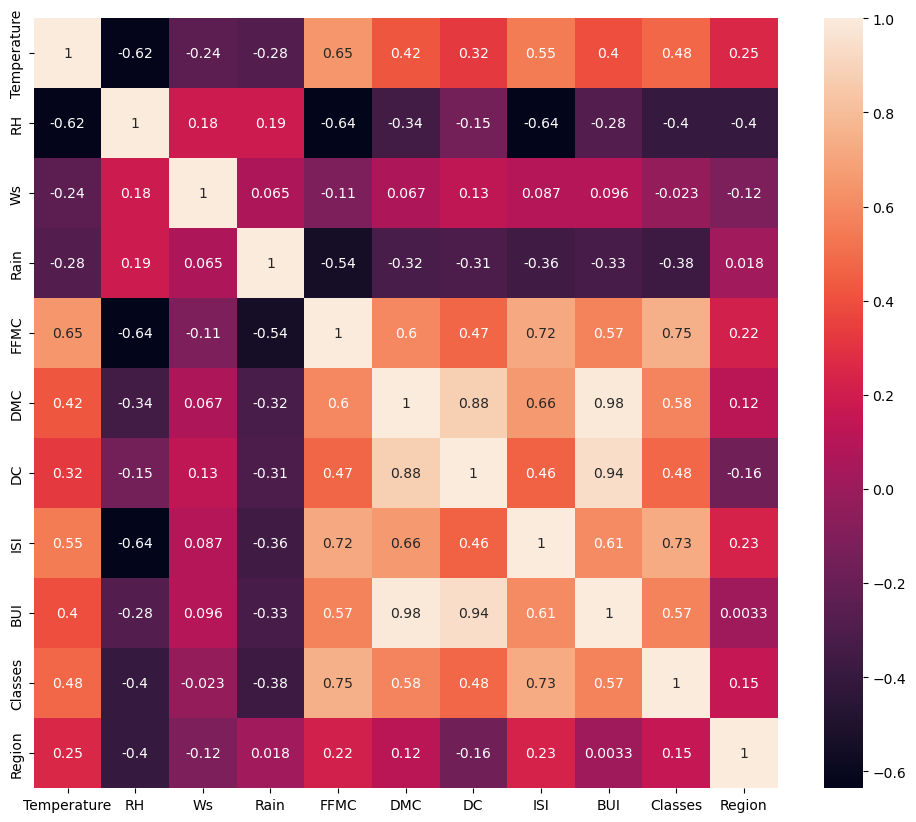

In [39]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [40]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [42]:
corr_features

{'BUI', 'DC'}

In [43]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((184, 9), (59, 9))

In [44]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_s=Scaler.fit_transform(X_train)
X_test_s=Scaler.transform(X_test)

In [45]:
X_train_s

array([[ 0.77969019, -0.40553822, -0.56081612, ...,  0.71378703,
         0.91651514,  1.        ],
       [-1.45754949, -0.26899837,  0.52539616, ...,  1.00787953,
         0.91651514,  1.        ],
       [ 0.77969019, -0.13245851, -0.19874536, ...,  0.88534099,
         0.91651514, -1.        ],
       ...,
       [ 0.50003523,  0.61851072, -0.56081612, ..., -0.87921406,
        -1.09108945,  1.        ],
       [ 0.77969019, -0.47380815, -1.28495764, ..., -0.7076601 ,
        -1.09108945, -1.        ],
       [-0.33892965, -1.36131724,  1.9736792 , ...,  2.15974186,
         0.91651514,  1.        ]])

C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_22556\1226233207.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

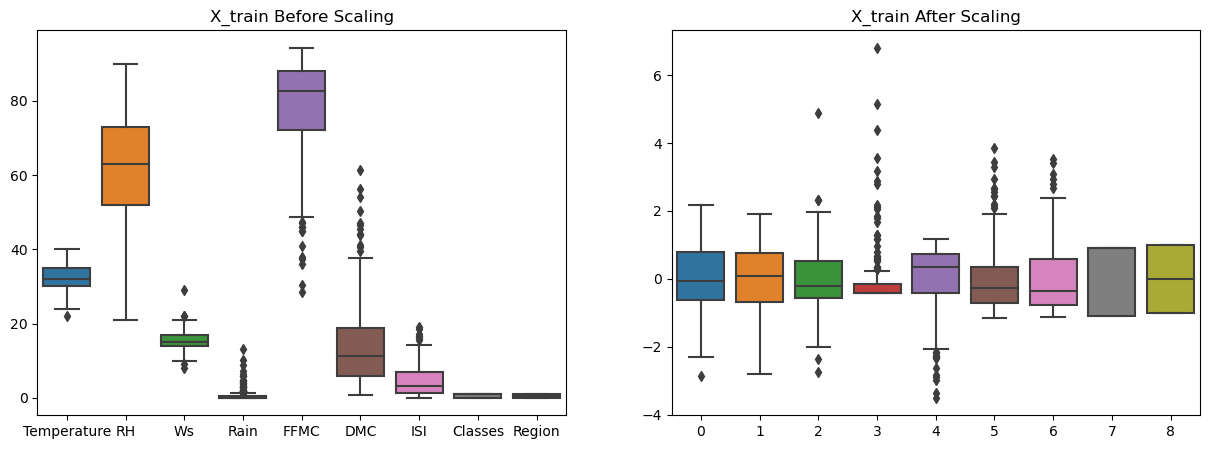

In [46]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_s)
plt.title('X_train After Scaling')

Mean absolute error 0.6897319937250341
R2 Score 0.9851421433682328


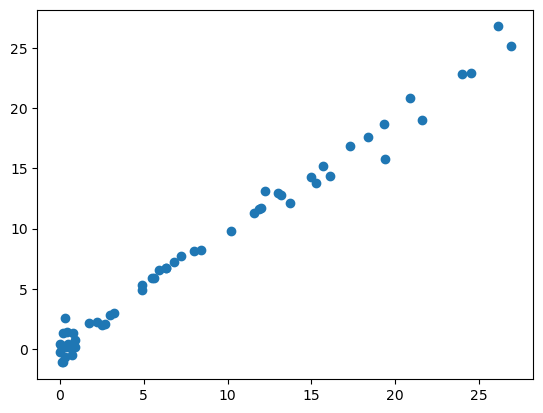

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_s,y_train)
y_pred=linreg.predict(X_test_s)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.2767493529786675
R2 Score 0.9519094882851286


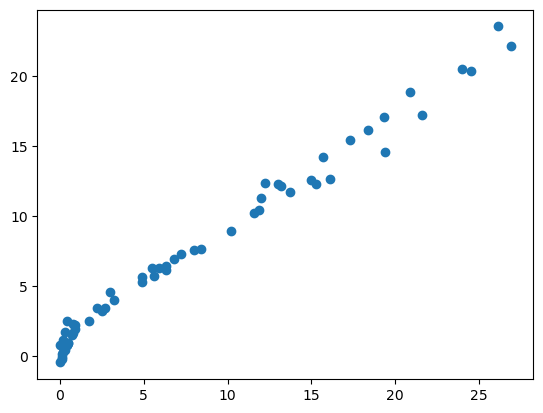

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_s,y_train)
y_pred=lasso.predict(X_test_s)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7041069721298127
R2 Score 0.9846110204418741


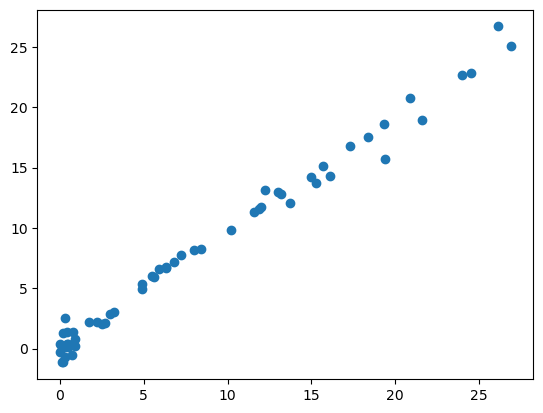

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_s,y_train)
y_pred=ridge.predict(X_test_s)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.840287200989711
R2 Score 0.9787420035420585


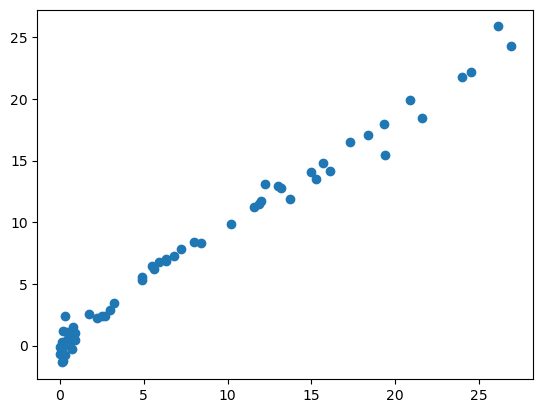

In [61]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_s,y_train)
y_pred=ridgecv.predict(X_test_s)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.938750663468431
R2 Score 0.8910386667040451


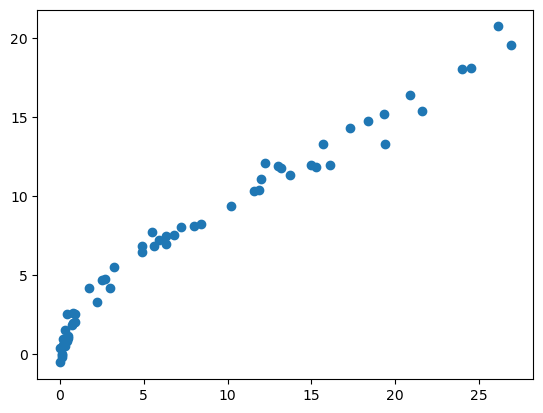

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_s,y_train)
y_pred=elastic.predict(X_test_s)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

AS we have compared different regression as linear regression ,lasso ,ridge and Elasticnet
the best one was linear and ridge

In [64]:
Scaler

StandardScaler()

In [65]:
ridge

Ridge()

In [66]:
linreg

LinearRegression()

In [67]:
import pickle

In [68]:
pickle.dump(Scaler,open('scaler.pkl','wb'))

In [69]:
pickle.dump(ridge,open('ridge.pkl','wb'))

In [70]:
pickle.dump(linreg,open('linreg.pkl','wb'))